In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
b ={} #dict for count statistics
for w in words: # pairwise generation
    chs = ['<S>'] + list(w) + ['<S>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)   #bigram as the key
        b[bigram] = b.get(bigram, 0) + 1 # counting the occurance
       
    

In [5]:
sorted(b.items(), key = lambda kv:-kv[1]) # sorting by the values

[(('n', '<S>'), 6763),
 (('a', '<S>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<S>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<S>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<S>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<S>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
import torch

In [7]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [8]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0


In [9]:


for w in words: # pairwise generation
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
       
    

In [10]:

itos = {i:s for s, i in stoi.items()}

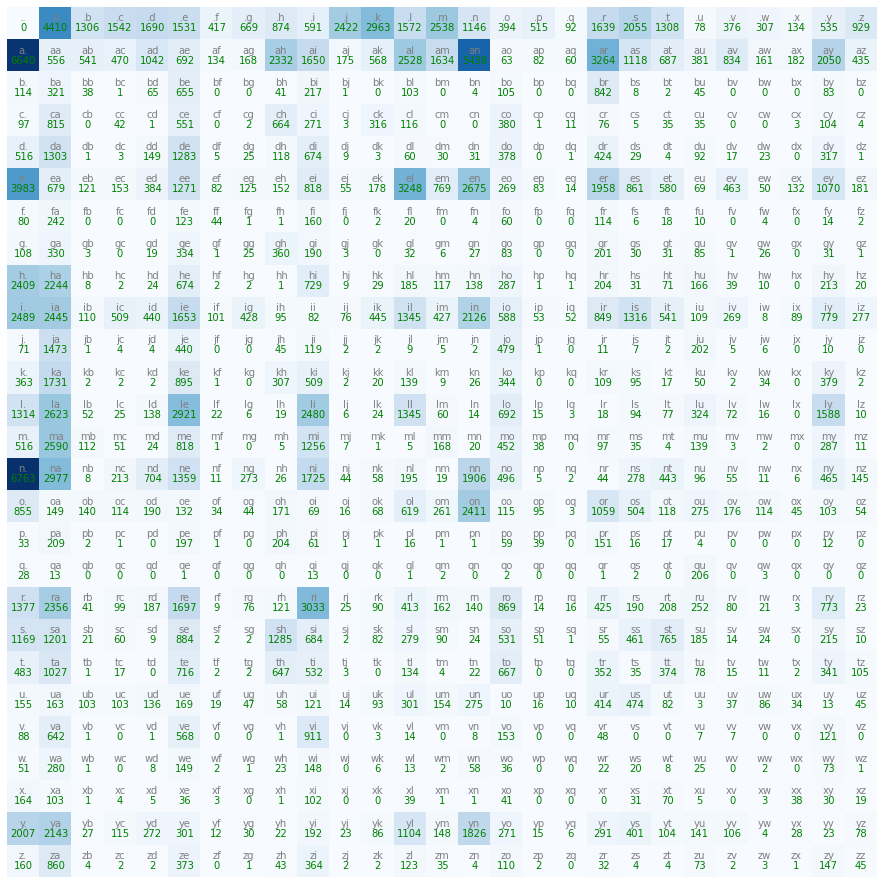

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='green')
plt.axis('off');


In [13]:
p = N[0].float()
p = p / p.sum() #normalized the data to probability

p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [14]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [15]:
g = torch.Generator().manual_seed(2147483647)                                 
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'a'

In [16]:
P = N.float()

In [17]:
P.shape

torch.Size([27, 27])

In [18]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [19]:
P = N.float()
P = P / P.sum(1, keepdim=True)

In [20]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [21]:
g = torch.Generator().manual_seed(2147483647)


for i in range(5):
    out = []
    ix = 0

    while True:
        p = N[ix].float()
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [22]:
#goal: maximize likelihood of hte data w.r.t. model parameters (statistical modeling)
#equivalent to maximizing the log likelihood (becasue log is monotonic)
#equivalent to minimizing the negative log likelihood
#equivalent to minimizing the average negative log likelihood

n = 0.0
log_likelihood = 0.0
for w in ['andrejq']: # pairwise generation
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob: .4f} {logprob}')
        
print(f'{log_likelihood=}')   
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}') #loss value #(averaging)

.a:  0.1376 -1.983507752418518
an:  0.1604 -1.8301737308502197
nd:  0.0384 -3.2594051361083984
dr:  0.0770 -2.564587354660034
re:  0.1334 -2.0142745971679688
ej:  0.0027 -5.900386333465576
jq:  0.0003 -7.981733322143555
q.:  0.0970 -2.3331477642059326
log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
3.4834020137786865


In [23]:
# create the training set of bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [24]:


xs

tensor([ 0,  5, 13, 13,  1])

In [25]:
ys

tensor([ 5, 13, 13,  1,  0])

In [30]:
import torch.nn.functional as F


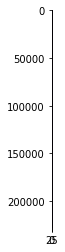

In [51]:
plt.imshow(xenc)

In [138]:
xenc.dtype

torch.float32

In [28]:
W = torch.randn((27,27))
xenc @ W  #martrix multplication in PYtorch

NameError: name 'xenc' is not defined

In [29]:
#forwarding pass
xenc = F.one_hot(xs, num_classes=27).float() #input to the network: one-hot encoding
logits = xenc @W # predict log-counts
counts = (xenc @ W).exp() #counts, equivalent N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
probs
#btw: the last 2 lines here are together called 'softmax'

tensor([[0.0025, 0.0337, 0.0233, 0.0104, 0.0205, 0.0338, 0.0082, 0.0087, 0.0675,
         0.0406, 0.0123, 0.0817, 0.0060, 0.0527, 0.0570, 0.0410, 0.0030, 0.0203,
         0.0114, 0.0317, 0.0239, 0.0267, 0.1072, 0.0502, 0.1938, 0.0291, 0.0029],
        [0.0702, 0.0304, 0.0078, 0.0209, 0.0307, 0.0394, 0.0708, 0.0615, 0.0769,
         0.0220, 0.0353, 0.0194, 0.0139, 0.0226, 0.0167, 0.0201, 0.0436, 0.0218,
         0.1415, 0.0180, 0.0422, 0.0128, 0.0346, 0.0562, 0.0280, 0.0016, 0.0410],
        [0.0096, 0.0056, 0.0172, 0.0238, 0.0171, 0.0340, 0.0425, 0.0040, 0.0060,
         0.0131, 0.0166, 0.0500, 0.0219, 0.0139, 0.2953, 0.0504, 0.0264, 0.0280,
         0.0350, 0.0538, 0.0113, 0.0192, 0.0473, 0.0374, 0.0203, 0.0721, 0.0283],
        [0.0096, 0.0056, 0.0172, 0.0238, 0.0171, 0.0340, 0.0425, 0.0040, 0.0060,
         0.0131, 0.0166, 0.0500, 0.0219, 0.0139, 0.2953, 0.0504, 0.0264, 0.0280,
         0.0350, 0.0538, 0.0113, 0.0192, 0.0473, 0.0374, 0.0203, 0.0721, 0.0283],
        [0.0106, 0.0600,

In [163]:
nlls = torch.zeros(5)
for i in range(5):
    #i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', nll.item())
    nlls[i] = nll
    
    print('=======')
    print('average negative log likelihood, i.e. loss=', nlls.mean().item())

--------
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0223, 0.2262, 0.0384, 0.0131, 0.0254, 0.0203, 0.0159, 0.0179, 0.0148,
        0.0275, 0.0520, 0.1176, 0.0088, 0.0050, 0.0081, 0.0121, 0.1469, 0.0146,
        0.0129, 0.0102, 0.0219, 0.0451, 0.0162, 0.0547, 0.0241, 0.0186, 0.0095])
label (actual next character): 5
probability assigned by the net to the correct character: 0.020343663170933723
log likelihood: 27.867216110229492
average negative log likelihood, i.e. loss= 5.573443412780762
--------
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0335, 0.0079, 0.1334, 0.1286, 0.0349, 0.0044, 0.0151, 0.0141, 0.0523,
        0.0101, 0.0209, 0.0373, 0.0443, 0.0350, 0.0118, 0.0067, 0.0167, 0.0124,
        0.0656, 0.0075, 0.0142, 0.0036, 0.0424, 0.0847, 0.0845, 0.0602, 0.0180])
label (actual next character): 13
probability assigned by the net to the correct

In [177]:
xs

tensor([ 0,  5, 13, 13,  1])

In [178]:
ys

tensor([ 5, 13, 13,  1,  0])

In [34]:
#randomly initialize 27 neurons' weigths. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [35]:
#forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [36]:
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [200]:
#backward pass
W.grad = None # s``et to zero the gradient
loss.backward()

In [201]:
W.grad.shape

torch.Size([27, 27])

In [46]:
# create the training set of bigrams (x, y)
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number fo examples:', num)

#randomly initialize 27 neurons' weigths. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

. e
e m
m m
m a
a .
. o
o l
l i
i v
v i
i a
a .
. a
a v
v a
a .
. i
i s
s a
a b
b e
e l
l l
l a
a .
. s
s o
o p
p h
h i
i a
a .
. c
c h
h a
a r
r l
l o
o t
t t
t e
e .
. m
m i
i a
a .
. a
a m
m e
e l
l i
i a
a .
. h
h a
a r
r p
p e
e r
r .
. e
e v
v e
e l
l y
y n
n .
. a
a b
b i
i g
g a
a i
i l
l .
. e
e m
m i
i l
l y
y .
. e
e l
l i
i z
z a
a b
b e
e t
t h
h .
. m
m i
i l
l a
a .
. e
e l
l l
l a
a .
. a
a v
v e
e r
r y
y .
. s
s o
o f
f i
i a
a .
. c
c a
a m
m i
i l
l a
a .
. a
a r
r i
i a
a .
. s
s c
c a
a r
r l
l e
e t
t t
t .
. v
v i
i c
c t
t o
o r
r i
i a
a .
. m
m a
a d
d i
i s
s o
o n
n .
. l
l u
u n
n a
a .
. g
g r
r a
a c
c e
e .
. c
c h
h l
l o
o e
e .
. p
p e
e n
n e
e l
l o
o p
p e
e .
. l
l a
a y
y l
l a
a .
. r
r i
i l
l e
e y
y .
. z
z o
o e
e y
y .
. n
n o
o r
r a
a .
. l
l i
i l
l y
y .
. e
e l
l e
e a
a n
n o
o r
r .
. h
h a
a n
n n
n a
a h
h .
. l
l i
i l
l l
l i
i a
a n
n .
. a
a d
d d
d i
i s
s o
o n
n .
. a
a u
u b
b r
r e
e y
y .
. e
e l
l l
l i
i e
e .
. s
s t


n s
s h
h i
i k
k a
a .
. a
a r
r a
a y
y n
n a
a .
. a
a r
r l
l a
a .
. a
a r
r l
l e
e n
n .
. a
a r
r n
n i
i k
k a
a .
. a
a s
s e
e e
e s
s .
. a
a u
u g
g u
u s
s t
t i
i n
n e
e .
. a
a u
u t
t u
u m
m .
. a
a v
v i
i t
t a
a l
l .
. a
a z
z a
a l
l e
e e
e .
. a
a z
z a
a r
r a
a h
h .
. a
a z
z e
e l
l i
i e
e .
. b
b e
e r
r l
l y
y n
n .
. b
b o
o w
w e
e n
n .
. b
b r
r e
e a
a h
h .
. b
b r
r o
o g
g a
a n
n .
. c
c a
a i
i .
. c
c a
a m
m y
y a
a .
. c
c a
a t
t a
a l
l e
e a
a .
. c
c a
a t
t e
e l
l y
y n
n .
. c
c h
h i
i o
o m
m a
a .
. c
c h
h r
r i
i s
s l
l y
y n
n .
. c
c i
i e
e r
r a
a .
. c
c l
l a
a r
r k
k .
. d
d a
a i
i j
j a
a .
. d
d a
a i
i l
l y
y n
n n
n .
. d
d a
a n
n a
a h
h .
. d
d a
a r
r i
i e
e l
l l
l e
e .
. d
d a
a r
r l
l i
i n
n .
. d
d a
a v
v i
i e
e .
. d
d e
e b
b b
b i
i e
e .
. d
d e
e c
c k
k l
l y
y n
n .
. d
d e
e l
l a
a y
y l
l a
a .
. d
d e
e v
v a
a n
n y
y .
. d
d e
e v
v i
i .
. d
d o
o r
r e
e e
e n
n .
. e
e i
i l
l e
e e


a l
l y
y n
n n
n .
. r
r o
o s
s e
e b
b e
e l
l l
l a
a .
. r
r u
u d
d i
i .
. r
r u
u s
s .
. r
r u
u t
t v
v i
i .
. r
r u
u w
w a
a i
i d
d a
a .
. r
r y
y e
e l
l e
e i
i g
g h
h .
. r
r y
y l
l i
i e
e e
e .
. s
s a
a b
b r
r i
i a
a .
. s
s a
a b
b r
r y
y n
n a
a .
. s
s a
a d
d i
i .
. s
s a
a d
d i
i e
e m
m a
a e
e .
. s
s a
a f
f i
i .
. s
s a
a f
f i
i r
r e
e .
. s
s a
a f
f i
i y
y y
y a
a .
. s
s a
a g
g a
a .
. s
s a
a h
h a
a l
l i
i e
e .
. s
s a
a h
h a
a r
r a
a h
h .
. s
s a
a l
l a
a y
y a
a h
h .
. s
s a
a m
m e
e e
e n
n .
. s
s a
a m
m e
e e
e r
r a
a h
h .
. s
s a
a m
m h
h i
i t
t a
a .
. s
s a
a m
m u
u s
s .
. s
s a
a m
m y
y r
r a
a h
h .
. s
s a
a n
n d
d i
i .
. s
s a
a n
n t
t a
a .
. s
s a
a n
n y
y i
i a
a .
. s
s a
a n
n y
y i
i a
a h
h .
. s
s a
a n
n y
y l
l a
a .
. s
s a
a n
n y
y l
l a
a h
h .
. s
s a
a r
r a
a b
b e
e t
t h
h .
. s
s a
a r
r a
a e
e .
. s
s a
a y
y d
d i
i .
. s
s a
a y
y r
r e
e .
. s
s e
e a
a n
n a
a .
. s
s e
e l
l b
b y


e .
. j
j a
a n
n a
a r
r i
i a
a .
. j
j a
a n
n e
e l
l i
i z
z .
. j
j a
a n
n e
e y
y a
a .
. j
j a
a n
n h
h v
v i
i .
. j
j a
a n
n i
i t
t z
z a
a .
. j
j a
a n
n n
n i
i e
e .
. j
j a
a n
n v
v i
i k
k a
a .
. j
j a
a r
r i
i e
e l
l y
y z
z .
. j
j a
a s
s h
h l
l y
y n
n .
. j
j a
a s
s m
m e
e l
l y
y .
. j
j a
a s
s n
n e
e e
e t
t .
. j
j a
a t
t a
a v
v i
i a
a .
. j
j a
a x
x l
l y
y n
n .
. j
j a
a y
y l
l a
a h
h n
n i
i .
. j
j a
a y
y l
l a
a n
n i
i s
s .
. j
j a
a y
y l
l a
a n
n n
n i
i e
e .
. j
j a
a y
y l
l a
a r
r o
o s
s e
e .
. j
j a
a y
y l
l e
e e
e a
a n
n a
a .
. j
j a
a y
y l
l e
e n
n n
n .
. j
j a
a y
y l
l i
i a
a h
h .
. j
j a
a y
y l
l i
i a
a n
n i
i z
z .
. j
j a
a y
y l
l i
i a
a n
n n
n i
i .
. j
j a
a y
y l
l i
i n
n a
a .
. j
j a
a y
y l
l i
i s
s e
e .
. j
j a
a y
y l
l o
o n
n i
i .
. j
j a
a y
y m
m e
e s
s o
o n
n .
. j
j a
a y
y o
o n
n i
i .
. j
j a
a y
y s
s i
i e
e .
. j
j a
a y
y s
s o
o n
n .
. j
j a
a y
y v
v a
a .
. j
j a
a y
y v


d h
h r
r i
i t
t .
. a
a f
f f
f a
a n
n .
. a
a l
l e
e n
n .
. a
a l
l e
e x
x e
e i
i .
. a
a l
l p
p h
h o
o n
n s
s e
e .
. a
a m
m a
a a
a n
n .
. a
a n
n w
w a
a r
r .
. a
a r
r t
t e
e m
m i
i s
s .
. b
b a
a r
r t
t h
h o
o l
l o
o m
m e
e w
w .
. b
b r
r a
a d
d l
l y
y .
. b
b r
r a
a e
e d
d o
o n
n .
. b
b r
r e
e y
y d
d e
e n
n .
. b
b r
r i
i x
x .
. b
b u
u c
c k
k .
. c
c i
i n
n c
c e
e r
r e
e .
. c
c o
o l
l e
e t
t o
o n
n .
. e
e l
l i
i e
e .
. e
e m
m r
r y
y .
. e
e s
s s
s a
a .
. f
f r
r e
e e
e m
m a
a n
n .
. g
g a
a v
v e
e n
n .
. h
h a
a r
r d
d y
y .
. h
h o
o l
l d
d y
y n
n .
. j
j a
a s
s e
e n
n .
. j
j h
h a
a s
s e
e .
. j
j u
u e
e l
l .
. k
k a
a e
e s
s y
y n
n .
. k
k a
a s
s h
h m
m e
e r
r e
e .
. k
k e
e n
n d
d e
e l
l l
l .
. k
k h
h a
a l
l e
e e
e l
l .
. k
k o
o a
a h
h .
. k
k y
y r
r e
e l
l l
l .
. l
l a
a m
m a
a r
r c
c u
u s
s .
. l
l a
a m
m a
a r
r i
i o
o n
n .
. l
l e
e o
o b
b a
a r
r d
d o
o .
. m
m a
a c
c k
k e
e n
n z


i f
f .
. r
r a
a j
j o
o n
n .
. r
r a
a m
m a
a .
. r
r a
a n
n i
i .
. r
r a
a s
s h
h a
a n
n .
. r
r a
a s
s h
h u
u n
n .
. r
r a
a u
u d
d e
e l
l .
. r
r a
a y
y g
g e
e n
n .
. r
r a
a y
y l
l y
y n
n .
. r
r a
a y
y m
m i
i r
r .
. r
r a
a y
y n
n i
i e
e l
l .
. r
r a
a y
y s
s h
h o
o n
n .
. r
r e
e g
g i
i n
n o
o .
. r
r e
e n
n n
n i
i c
c k
k .
. r
r e
e x
x x
x .
. r
r h
h y
y l
l e
e n
n .
. r
r i
i d
d h
h a
a n
n .
. r
r i
i l
l e
e e
e .
. r
r o
o b
b e
e r
r t
t s
s o
o n
n .
. r
r o
o m
m a
a n
n i
i .
. r
r o
o m
m a
a n
n n
n .
. r
r o
o m
m y
y n
n .
. r
r o
o r
r i
i c
c k
k .
. r
r o
o s
s h
h a
a w
w n
n .
. r
r o
o y
y s
s t
t o
o n
n .
. r
r u
u a
a r
r i
i .
. r
r y
y d
d a
a n
n .
. r
r y
y h
h e
e e
e m
m .
. r
r y
y l
l y
y n
n n
n .
. s
s a
a f
f a
a l
l .
. s
s a
a l
l a
a h
h u
u d
d d
d i
i n
n .
. s
s a
a l
l m
m a
a a
a n
n .
. s
s a
a q
q u
u a
a n
n .
. s
s a
a r
r k
k i
i s
s .
. s
s a
a v
v i
i a
a n
n .
. s
s a
a y
y y
y i
i d
d .
. s
s e


a .
. d
d e
e y
y b
b i
i .
. d
d e
e y
y m
m a
a r
r .
. d
d e
e z
z m
m a
a n
n .
. d
d e
e z
z m
m u
u n
n d
d .
. d
d h
h a
a n
n u
u s
s h
h .
. d
d i
i a
a a
a n
n .
. d
d i
i a
a m
m o
o n
n t
t e
e .
. d
d i
i e
e r
r r
r e
e .
. d
d i
i o
o n
n t
t a
a .
. d
d i
i q
q u
u a
a n
n .
. d
d i
i v
v i
i t
t h
h .
. d
d i
i v
v y
y a
a n
n .
. d
d i
i v
v y
y a
a n
n s
s h
h .
. d
d i
i y
y a
a a
a n
n .
. d
d j
j a
a n
n g
g o
o .
. d
d m
m a
a r
r c
c o
o .
. d
d m
m a
a r
r c
c u
u s
s .
. d
d m
m e
e r
r e
e .
. d
d m
m y
y t
t r
r o
o .
. d
d o
o m
m a
a n
n i
i c
c k
k .
. d
d o
o m
m i
i t
t r
r i
i .
. d
d o
o n
n i
i .
. d
d o
o n
n n
n o
o v
v a
a n
n .
. d
d o
o n
n t
t a
a r
r i
i u
u s
s .
. d
d o
o r
r e
e n
n .
. d
d o
o r
r s
s e
e y
y .
. d
d o
o r
r u
u k
k .
. d
d r
r a
a d
d e
e n
n .
. d
d r
r e
e y
y .
. d
d r
r e
e y
y l
l e
e n
n .
. d
d r
r i
i s
s h
h .
. d
d r
r i
i s
s t
t a
a n
n .
. d
d r
r u
u v
v .
. d
d u
u n
n e
e .
. d
d u
u p
p r
r e
e e
e .
. d


In [49]:
(W**2).mean()

tensor(1.6880, grad_fn=<MeanBackward0>)

In [50]:
#gradient descent
for k in range(100):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean() # regularization
    print(loss.item())
    
    #backward pass
    W.grad = None # s``et to zero the gradient
    loss.backward()
    
    #update parameter W
    W.data += -50 * W.grad

2.489532709121704
2.4893808364868164
2.48923397064209
2.4890923500061035
2.4889540672302246
2.4888200759887695
2.4886891841888428
2.4885616302490234
2.4884371757507324
2.4883158206939697
2.4881975650787354
2.488081693649292
2.4879684448242188
2.4878580570220947
2.4877498149871826
2.4876437187194824
2.4875402450561523
2.4874391555786133
2.487340211868286
2.487243175506592
2.4871482849121094
2.4870550632476807
2.4869637489318848
2.486874580383301
2.4867873191833496
2.486701726913452
2.4866178035736084
2.4865355491638184
2.486454725265503
2.4863758087158203
2.486298084259033
2.4862220287323
2.486147403717041
2.486074209213257
2.4860024452209473
2.4859323501586914
2.485862970352173
2.485795021057129
2.4857285022735596
2.4856631755828857
2.4855988025665283
2.4855358600616455
2.485473871231079
2.4854133129119873
2.485353708267212
2.485295057296753
2.4852371215820312
2.485180616378784
2.4851250648498535
2.4850704669952393
2.4850168228149414
2.4849636554718018
2.484912157058716
2.4848611354827

In [53]:
#finally, sample from the 'neural net model'
g = torch.Generator().manual_seed(2147483647)


for i in range(5):
    out = []
    ix = 0

    while True:
        #------------------
        #Before:
        #p = N[ix].float()
        #Now:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) #probabilities for next character
        #--------------
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondmaisah.
anchshizarie.
